In [2]:
import pandas as pd
import math
import numpy as np
import pandas as pd
from simanneal import Annealer
import inspyred
from inspyred import ec
from random import Random


[ 99.99404073 111.72696305] : 6366.197701067629


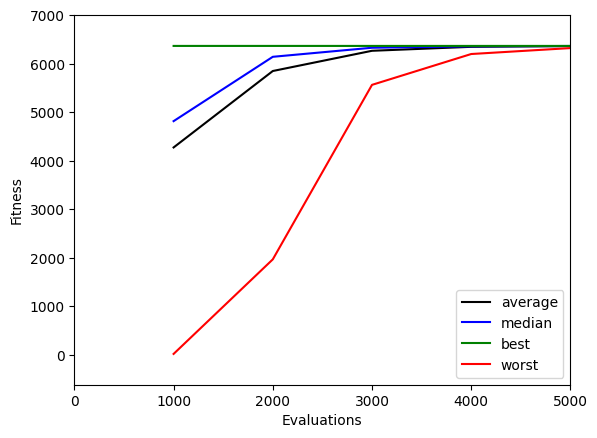

In [8]:
def generate(random=None, args=None):  # genereert 1 individu
    size = args.get('num_inputs', 2)  # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=0, high=200, size=size)


def evaluate(candidates, args=None):
    fitness = []
    
    for candidate in candidates:  # fitness uitrekenen voor alle individuen
        l=candidate[0]
        b= (400 - 2 * l)/ math.pi 
        sum =  b * l
        fitness.append(sum)
    return fitness


rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    # selector = ec.selectors.tournament_selection,  # voor tournament
    tournament_size=250,
    pop_size=1000,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(0, 200),
    max_evaluations=5000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])
# 
# class voetbalProblem(Annealer):
#     def energy(self):
#         l = self.state[0]
#         b= (400 - 2 * l)/ math.pi 
#         sum =  b * l
#         return - sum    # + voor minimum - voor maximum
# 
#     def move(self):
#         i=0
#         self.state[i] += np.random.normal(0, 0.1)
#         self.state[i] = np.clip(self.state[i], 0, 200)
# init_sol =  np.random.uniform(0,200, size=1) #initial solution: array met 1 elementen
# opdracht=voetbalProblem(init_sol)
# # set annealing parameters, if not default values will be used
# opdracht.Tmax = 25000.0 
# opdracht.Tmin = 2.5 
# opdracht.updates = 1000
# opdracht.steps = 100000
# opt_sol = opdracht.anneal()
# print(opt_sol)

[99.99231184 80.78522872] : 6366.197686046583


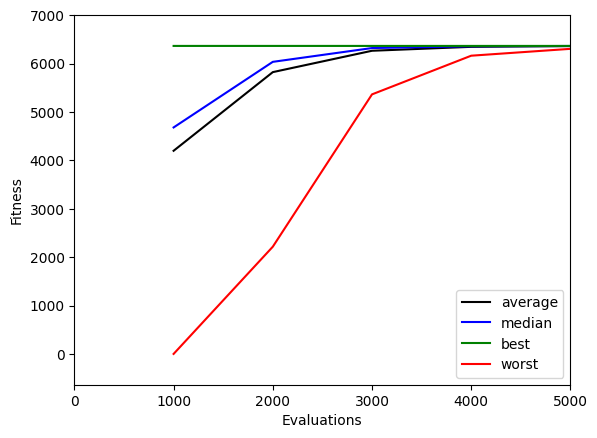

In [4]:
def generate(random=None, args=None):
    size = args.get("num_inputs")
    return np.random.uniform(low=0,high=200,size=size)


def evaluate(candidates, args=None):
    fitness = []
    
    for candidate in candidates:  # fitness uitrekenen voor alle individuen
        l=candidate[0]
        b=(400-2*l)/math.pi
        sum = l*b
        fitness.append(sum)
    return fitness 
rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    tournament_size=250,
    pop_size=1000,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(0, 200),
    max_evaluations=5000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])

In [5]:
distance_matrix = np.array([[0, 100, 125, 100,  75],
                            [100, 0,  50,  75, 100],
                            [125, 50,  0, 100, 125],
                            [100, 75, 100,   0, 50],
                            [75, 100, 125,  50,  0]]) 
class heuristics(Annealer):
    def move(self):
        """Swaps two cities in the route."""
        a = np.random.randint(0, len(self.state) - 1)
        b = np.random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]
        
    def energy(self):
        """Calculates the length of the route."""
        dist = 0
        for i in range(len(self.state)):
           dist += distance_matrix[self.state[i - 1], self.state[i]]
        return dist
initial = [0,2,4,1,3]
tsp = heuristics(initial)
route , distance = tsp.anneal()
print(route , distance)
75 + 125 + 50 + 100

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


[4, 0, 2, 1, 3] 375


350

In [6]:
50+100+75+50+100


375

[0.25015168 0.57065026] : 0.0397887211260518


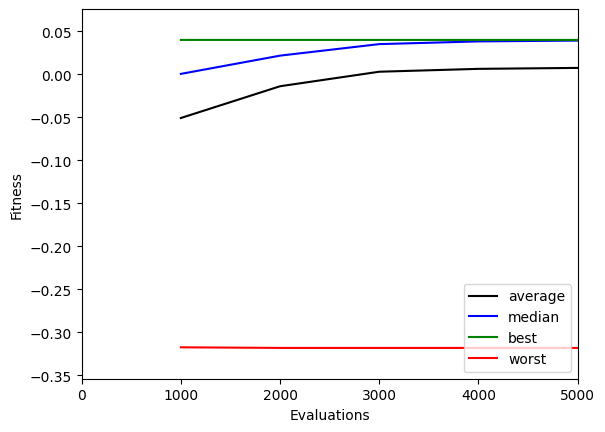

In [9]:
def generate(random=None, args=None):  # genereert 1 individu
    size = args.get('num_inputs', 2)  # num_inputs is passed as parameter in evolve fc, if not defined: default is 2
    return np.random.uniform(low=0, high=1, size=size)


def evaluate(candidates, args=None):
    fitness = []
    
    for candidate in candidates:  # fitness uitrekenen voor alle individuen
        l=candidate[0]
        b= (1 - 2 * l)/ math.pi 
        sum =  b * l
        fitness.append(sum)
    return fitness


rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination  # wanneer stoppen: na max_evaluations (wij gebruiken altijd deze)
#ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # als 0-1 vector
ga.variator = [ec.variators.arithmetic_crossover,
               ec.variators.gaussian_mutation]  # als real: crosover = gemiddelde van ouders, mutation = kleine afwijking
ga.observer = ec.observers.plot_observer  # toevoegen als je plot wil
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    # selector=ec.selectors.fitness_proportionate_selection,  # voor roulettewiel
    selector = ec.selectors.tournament_selection,  # voor tournament
    tournament_size=250,
    pop_size=1000,  # population size
    maximize=True,  # zoek je max of min?
    bounder=ec.Bounder(0, 1),
    max_evaluations=5000,
    mutation_rate=0.25,
    num_inputs=2)  # eigen gedefinieerde parameter
population.sort(reverse=True)  # dan is 1ste de beste van de laatste populatie
print(population[0])